# Import Libraries (#2)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import data (#3)

In [2]:
# imports data
path = r'/Users/oliviamurphy/Desktop/Airlines Project/02 Data/Prepared Data'
airlines_df = pd.read_csv(os.path.join(path, 'airlines_final_df_new_variables.csv'))

# Clean data (#4)
## Data already cleaned in previous step

/Users/oliviamurphy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scheduled Elapsed Time (Minutes)', ylabel='Density'>

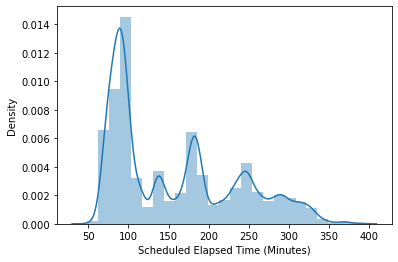

In [3]:
## Checks for extreme values
sns.distplot(airlines_df['Scheduled Elapsed Time (Minutes)'], bins = 25)

In [4]:
# returns descriptive stats for 'Delay Carrier (Minutes)'
airlines_df['Scheduled Elapsed Time (Minutes)'].describe()
# values over 314 (roughly) are outliers

count    278007.000000
mean        157.505279
std          78.080023
min          49.000000
25%          90.000000
50%         135.000000
75%         221.000000
max         390.000000
Name: Scheduled Elapsed Time (Minutes), dtype: float64

/Users/oliviamurphy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Actual Elapsed Time (Minutes)', ylabel='Density'>

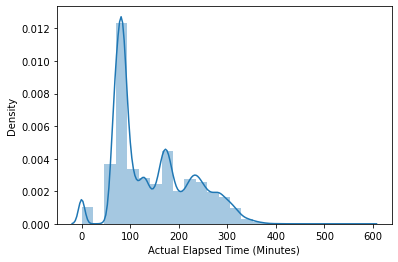

In [5]:
## Checks for extreme values
sns.distplot(airlines_df['Actual Elapsed Time (Minutes)'], bins = 25)

In [6]:
# creates new df without outliers
airlines_df_new = airlines_df[airlines_df['Scheduled Elapsed Time (Minutes)']<314]

/Users/oliviamurphy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scheduled Elapsed Time (Minutes)', ylabel='Density'>

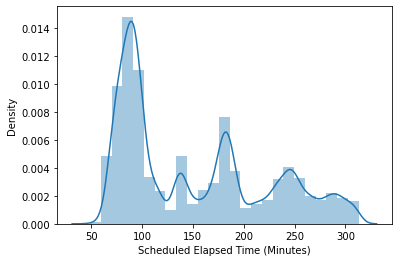

In [7]:
# outputs new histogram
sns.distplot(airlines_df_new['Scheduled Elapsed Time (Minutes)'], bins = 25)

# Explore data visually (#5)
## Data already explored visually in previous step. A modified scatter plot based on one from 6.2 has been brought in for the purpose of this task`

Text(0.5, 1.0, 'Relationship Between Actual Elapsed Time (Minutes) and Scheduled Elapsed Time (Minutes)')

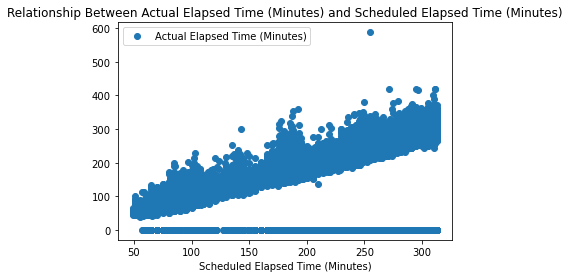

In [8]:
# returns scatterplot for Known Total Delay (Minutes) and Delay Carrier (Minutes) without outliers
airlines_df_new.plot(x = 'Scheduled Elapsed Time (Minutes)', y = 'Actual Elapsed Time (Minutes)', style = 'o')
plt.title('Relationship Between Actual Elapsed Time (Minutes) and Scheduled Elapsed Time (Minutes)')

# Hypothesis: The higher the Scheduled Elasped Times  (Minutes) the higher the Actual elasped Time (Minutes)

# Reshape the variables into Numpy arrays (#6)

In [9]:
# reshapes x and y variables into numpy arrays
X = airlines_df_new['Scheduled Elapsed Time (Minutes)'].values.reshape(-1, 1)
y = airlines_df_new['Actual Elapsed Time (Minutes)'].values.reshape(-1, 1)

# Split the data into a training set & test set (#7)

In [10]:
# splits data into test set & train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Run a linear regression on the data (#8)

In [11]:
# creates regression object
linear_regression = LinearRegression()

In [12]:
# fit model to training set
linear_regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# creates a prediction for y on the test set
y_predicted = linear_regression.predict(X_test)

# Create plot showingf the regression line on the test set (#9)

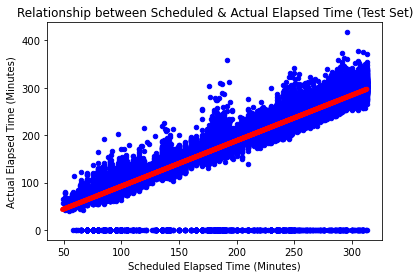

In [14]:
# creates plot for test set
plt.scatter(X_test, y_test, color = 'blue', s = 20)
plt.plot(X_test, y_predicted, color = 'red', linewidth = 5)
plt.title('Relationship between Scheduled & Actual Elapsed Time (Test Set)')
plt.xlabel('Scheduled Elapsed Time (Minutes)')
plt.ylabel('Actual Elapsed Time (Minutes)')
plt.show() # needed for terminal/other places etc



# How well does the line appear to fit the data in a markdown cell (#10)

In [15]:
# While the data does seem to have some sort of functional relationship for Actual Elapsed times that are not 0 (this poses the question of what does an acuual elapsed time of 0 mean (flight canceled?), there does seem to be a degree of distance between the line and the actual y values, as it does not pass through the majority of values. For this reason, I would say it is not a good fit.

# Check model performance stats (#11)

In [16]:
# define objects for regression coefficient, mean squared error, and r squared score
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [17]:
# prints regression coefficient, mean squared error, and r squared score
print ('Slope:', linear_regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.96145014]]
Mean squared error:  667.4562536525875
R2 score:  0.8767672517042665


# Compare predicted values with actual y values in a dataframe (#12)

In [18]:
# prints dataframe of actual vs predicted values
actual_vs_predicted = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_predicted.flatten()})

In [19]:
# creates a column for the difference between the actual and predicted elasped times
actual_vs_predicted['Difference'] = actual_vs_predicted['Actual'] - actual_vs_predicted['Predicted']

In [20]:
# outputs the first five rows of actual_vs_predicted
actual_vs_predicted.head()

,Actual,Predicted,Difference
0,74.0,72.847059,1.152941
1,128.0,120.919566,7.080434
2,59.0,63.232557,-4.232557
3,268.0,276.674489,-8.674489
4,77.0,77.654309,-0.654309


/Users/oliviamurphy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Difference', ylabel='Density'>

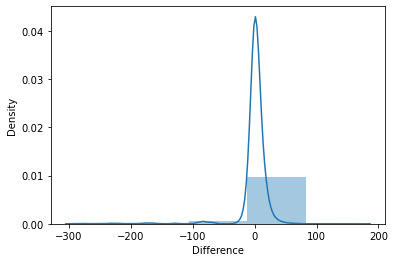

In [21]:
# shows the distributed of the the difference in the actual and predicted elapsed times of the test set
sns.distplot(actual_vs_predicted['Difference'], bins = 5)

# Thoughts on how well model performed on the dataset  and potential bias.

## the slope is positive, so as the schedule elapsed time increases, so does the actual elapsed time.
## The mean squared error is pretty large. meaning the regression line can be pretty far from the set of points.
## the r squared score is decent at about 0.88, meaning the line fits the variance of the data pretty well (this is probably why the line looks like it appears in the midst of all the points)
## The variance is probably being largely effected by Actual Elapsed times of 0 (this could be when flights are canceled). 
## This is not the best model for predicting the Actual Elapsed time because of the large variance - there are likely other factors effecting the actual elapsed time of a flight.
## Since the airlines reported the data themselves, there could be bias in reporting (for example, including actual elapsed flight times of '0' brings down the average actual elapsed time, but doesnt make a lot of sense (it would mean the flights were not in the air at all - were they canceled?). Whether this was actually intentional is unknown
## collection bias could also be prevalent. In the above example, did all airlines possibly include canceled flights or just one.
## measurement bias - if data collected by people/machines was incorrect, it would impact results